In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from sklearn import datasets
import seaborn as sns

In [2]:
np.random.seed(100)
scores_arr = np.vstack([np.random.choice(range(30,81), 20, replace = True),
                       np.random.choice(range(20,91), 20, replace = True)])
scores_arr

array([[38, 54, 33, 69, 53, 45, 78, 40, 60, 64, 32, 64, 44, 64, 79, 78,
        54, 45, 66, 73],
       [80, 78, 36, 29, 22, 47, 24, 51, 21, 33, 24, 79, 87, 27, 69, 67,
        85, 81, 34, 75]])

In [4]:
scores_df = pd.DataFrame(scores_arr.T,columns = ['eng', 'math'])

In [5]:
name = [name for name in string .ascii_uppercase[:20]]

In [6]:
scores_df['name'] = name

In [7]:
scores_df = scores_df[['name','eng','math']]

In [8]:
scores_df

,name,eng,math
0,A,38,80
1,B,54,78
2,C,33,36
3,D,69,29
4,E,53,22
5,F,45,47
6,G,78,24
7,H,40,51
8,I,60,21
9,J,64,33


In [11]:
scores_df.describe()

,eng,math
count,20.000000,20.000000
mean,56.650000,52.450000
std,15.118044,25.060926
min,32.000000,21.000000
25%,44.750000,28.500000
50%,57.000000,49.000000
75%,66.750000,78.250000
max,79.000000,87.000000


우리반의 영어와 수학 시험 결과 분석(기술통계 : descriptive stats analysis)  
  
응시자는 20명으로 동일하며, 평균 점수는 영어가 수학보다 4점 가량 높은 것으로 나타났다. 영어의 최소 최대값은 32-79점으로 수학의 최소 최대값인 21-87점보다 더 좁은 범위를 보이고 있다. 영어의 평균 점수와 중앙값은 거의 일치하는 것으로 보아 32-79점 사이에 비교적 고르게 분포하고 있을 것으로 판단된다. 반면 수학의 평균은 52.45로 중앙값 49보다 3.5점 가량 높게 나타났고 전체적인 분포에서 고득점자(들)가 존재할 것으로 보여진다. 표준편차를 살펴보아도 수학의 편차가 10점가량 커서 전체적인 산포가 영어보다 넓다.

[mean]

In [15]:
scores_df.describe().iloc[1]

eng     56.65
math    52.45
Name: mean, dtype: float64

In [16]:
scores_df['eng'].mean()

56.65

In [21]:
np.percentile(scores_df['eng'],75)

66.75

In [20]:
scores_df.quantile(0.75)

eng     66.75
math    78.25
Name: 0.75, dtype: float64

분산과 표준편차의 사용에는 주의가 필요하다.  
넘파이와 판다스에서 default로 반환하는 분산의 값이 서로 다르기 때문.  
  
넘파이는 데이터 자체의 분산을 계산하는 반면,  
판다스는 표본분산 (불편분산이라 칭함)을 계산한다. (표본표준편차) (n-1)로 나눈 값

In [22]:
# eng 표준편차
scores_df.describe().loc['std'][0]

15.11804429011553

In [23]:
np.std(scores_df['eng'])

14.735246859146947

In [24]:
scores_df['eng'].std()

15.11804429011553

In [25]:
scores_df['eng'].std(ddof = 0)

14.735246859146947

In [26]:
np.std(scores_df['eng'],ddof=1)

15.11804429011553

현재 데이터 자체의 표준편차를 구할 때는 넘파이 std() 디폴트를 사용하거나,  
판다스 std()의 ddof = 0 parameter를 적용한다.  
  

[표준편차와 표본표준편차 직접 구해보기]

In [28]:
n = 20
variance_eng = np.array(scores_df['eng']) - np.mean(scores_df['eng'])

In [29]:
# 표준편차
np.sqrt(sum(variance_eng ** 2)/n)

14.735246859146947

In [30]:
# 표본표준편차
np.sqrt(sum(variance_eng ** 2)/(n-1))

15.11804429011553

## **[시각화] : 도수분포표**

In [31]:
np.linspace(0,100,10+1)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

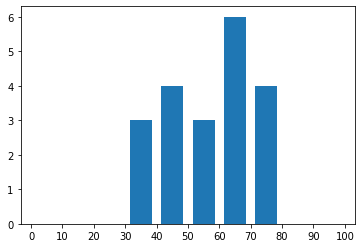

In [32]:
plt.hist(scores_df['eng'], bins = 10, range = (0,100), rwidth = 0.7)
plt.xticks(np.linspace(0,100,10+1))
plt.show()

## **누적상대도수 함께 표현하기**

In [33]:
np.histogram(scores_df['eng'], bins = 10, range = (0,100))

(array([0, 0, 0, 3, 4, 3, 6, 4, 0, 0], dtype=int64),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

In [91]:
rel_freq, _ = np.histogram(scores_df['eng'], bins = 10, range = (0,100))
np.cumsum(rel_freq) / sum(rel_freq)
cum_rel_freq = np.cumsum(rel_freq) / sum(rel_freq)

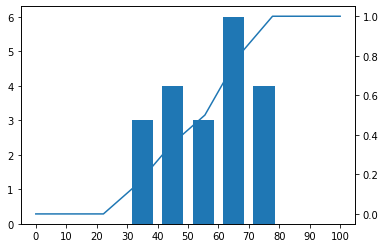

In [45]:
plt.hist(scores_df['eng'], bins = 10, range = (0,100), rwidth = 0.7)
plt.twinx()
plt.plot(np.linspace(0,100,10), cum_rel_freq)
plt.xticks(np.linspace(0,100,10+1))
plt.show()

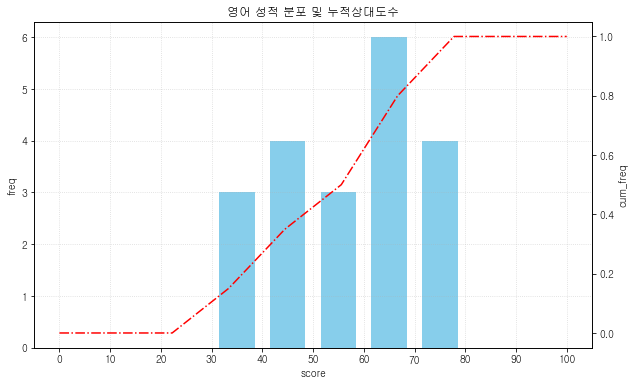

In [58]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

ax1.hist(scores_df['eng'], bins = 10, range = (0,100), rwidth = 0.7, color = 'skyblue')
ax2.plot(np.linspace(0,100,10), cum_rel_freq, color = 'red', ls = '-.')

ax1.set_xticks(np.linspace(0,100,10+1))
ax1.set_xlabel('score')
ax1.set_ylabel('freq')
ax2.set_ylabel('cum_freq')
ax1.grid(ls = ':', alpha = 0.5)
ax1.set_title('영어 성적 분포 및 누적상대도수')
import matplotlib.font_manager as fm
font_path = 'C:/windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname = font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.show()

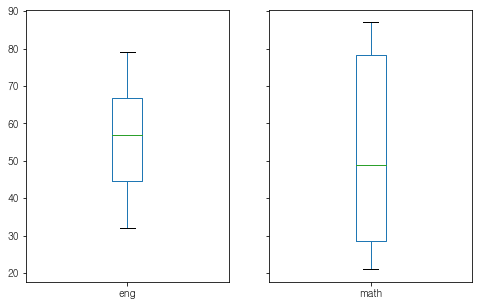

In [66]:
fig, ax = plt.subplots(1, 2, figsize = (8,5), sharey = True)
scores_df['eng'].plot.box(ax = ax[0])
scores_df['math'].plot.box(ax = ax[1])
plt.show()

No handles with labels found to put in legend.


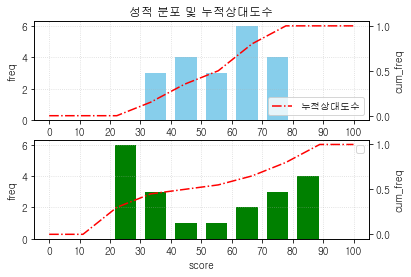

In [112]:
ax1 = plt.subplot(211)
ax_1 = ax1.twinx()
ax1.hist(scores_df['eng'], bins = 10, range = (0,100), rwidth = 0.7, color = 'skyblue', label = 'English')
ax_1.plot(np.linspace(0,100,10), cum_rel_freq, color = 'red', ls = '-.', label = '누적상대도수')
ax1.set_xticks(np.linspace(0,100,10+1))
ax1.set_xlabel('score')
ax1.set_ylabel('freq')
ax_1.set_ylabel('cum_freq')
ax1.grid(ls = ':', alpha = 0.5)
ax1.set_title('성적 분포 및 누적상대도수')
import matplotlib.font_manager as fm
font_path = 'C:/windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname = font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.legend(loc = 'lower right')

rel_freq2, _ = np.histogram(scores_df['math'], bins = 10, range = (0,100))
np.cumsum(rel_freq2) / sum(rel_freq2)
cum_rel_freq2 = np.cumsum(rel_freq2) / sum(rel_freq2)

ax2 = plt.subplot(212)
ax_2 = ax2.twinx()
hist_2= ax2.hist(scores_df['math'], bins = 10, range = (0,100), rwidth = 0.7, color = 'green', label = 'Math')
line_2= ax_2.plot(np.linspace(0,100,10), cum_rel_freq2, color = 'red', ls = '-.')
ax2.set_xticks(np.linspace(0,100,10+1))
ax2.set_xlabel('score')
ax2.set_ylabel('freq')
ax_2.set_ylabel('cum_freq')
ax2.grid(ls = ':', alpha = 0.5)
import matplotlib.font_manager as fm
font_path = 'C:/windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname = font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.legend()

No handles with labels found to put in legend.


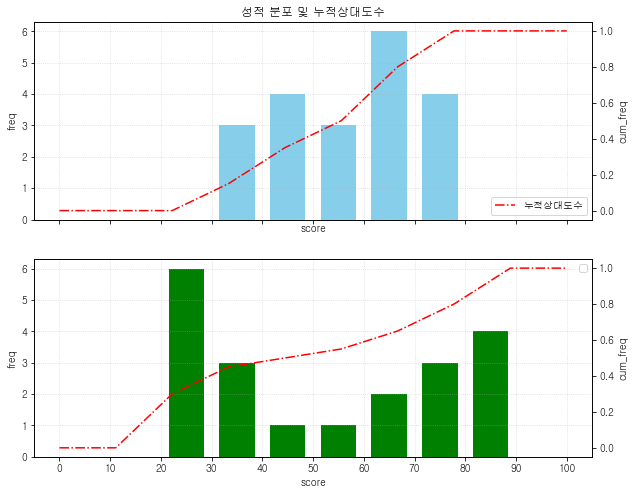

In [140]:
f, (ax1, ax2) = plt.subplots(2, figsize = (10,8),sharex=True, sharey=True)


ax_1 = ax1.twinx()
ax1.hist(scores_df['eng'], bins = 10, range = (0,100), rwidth = 0.7, color = 'skyblue', label = 'English')
ax_1.plot(np.linspace(0,100,10), cum_rel_freq, color = 'red', ls = '-.', label = '누적상대도수')
ax1.set_xticks(np.linspace(0,100,10+1))
ax1.set_xlabel('score')
ax1.set_ylabel('freq')
ax_1.set_ylabel('cum_freq')
ax1.grid(ls = ':', alpha = 0.5)
ax1.set_title('성적 분포 및 누적상대도수')
import matplotlib.font_manager as fm
font_path = 'C:/windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname = font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.legend(loc = 'lower right')

ax_2 = ax2.twinx()
line_2= ax_2.plot(np.linspace(0,100,10), cum_rel_freq2, color = 'red', ls = '-.')
hist_2= ax2.hist(scores_df['math'], bins = 10, range = (0,100), rwidth = 0.7, color = 'green', label = 'Math')

ax2.set_xticks(np.linspace(0,100,10+1))
ax2.set_xlabel('score')
ax2.set_ylabel('freq')
ax_2.set_ylabel('cum_freq')
ax2.grid(ls = ':', alpha = 0.5)
import matplotlib.font_manager as fm
font_path = 'C:/windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname = font_path).get_name()
plt.rcParams['font.family'] = font_name

plt.legend()
plt.show()

# **[연습]**
iris 데이터의 4개 변수(feature)에 이상치가 존재하는지 조사해보세요

In [118]:
iris = datasets.load_iris()

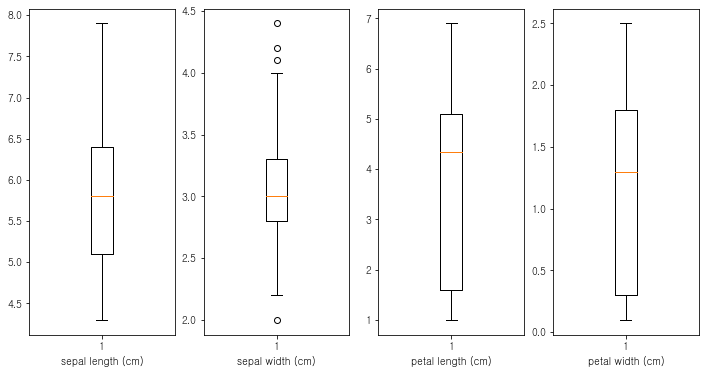

In [120]:
fig, axes = plt.subplots(1, 4, figsize = (12,6))

for i in range(4):
    axes[i].boxplot(iris['data'][:,i])
    axes[i].set_xlabel(iris['feature_names'][i])

In [128]:
iris['data'][iris['data'][:,1] <= 2.1,1]

array([2.])

In [131]:
iris['data'][iris['data'][:,1] > 4.0,1]

array([4.4, 4.1, 4.2])

In [132]:
iris_sepalW = iris['data'][:,1]

In [133]:
sepalW = pd.Series(iris['data'][:,1])

In [134]:
sepalW.describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
dtype: float64

### IQR 계산 (75% - 25%)

In [135]:
IQR = sepalW.describe().loc['75%'] - sepalW.describe().loc['25%']

In [136]:
IQR

0.5

### 극단치 경계 계산

In [137]:
# normal_range
sepalW.describe().loc['75%'] + 1.5 * IQR

4.05

In [138]:
sepalW.describe().loc['25%'] - 1.5 * IQR

2.05